In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


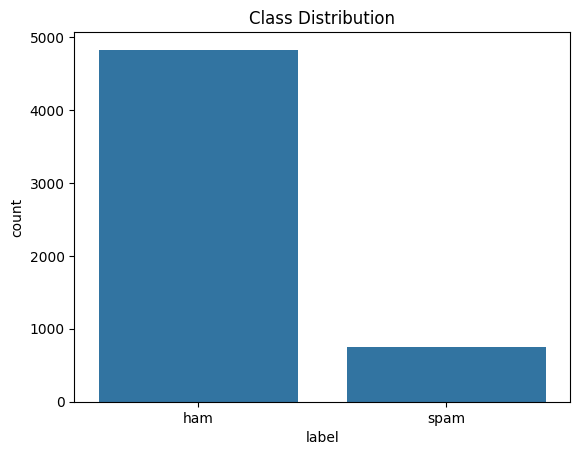

In [3]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

In [4]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

In [6]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-----------------------------------")
    report = classification_report(y_test, y_pred)
    output_dir = 'RESULTS'
    os.makedirs(output_dir, exist_ok=True)
    with open(os.path.join(output_dir, f'{model.__class__.__name__}_classification_report.txt'), 'w') as f:
        f.write(report)
    with open(os.path.join(output_dir, 'accuracy_summary.txt'), 'a') as f:
        f.write(f"{model.__class__.__name__}: {accuracy:.4f}\n")
    return accuracy

Model: MultinomialNB
Accuracy: 0.9668
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

-----------------------------------
Model: LogisticRegression
Accuracy: 0.9525
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

-----------------------------------
Model: LinearSVC
Accuracy: 0.9785
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99  

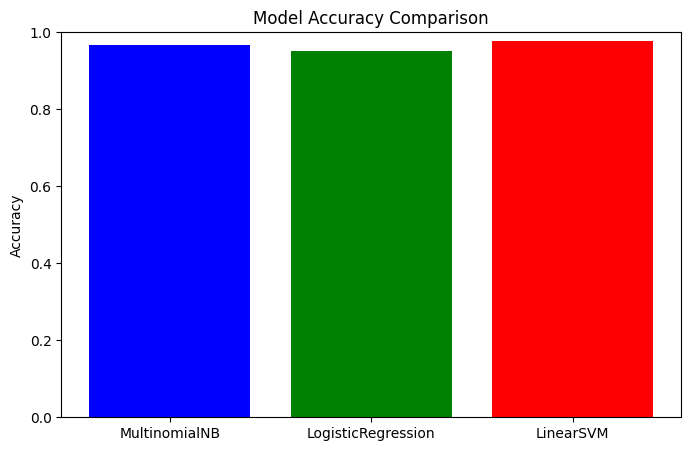

In [8]:
nb_model = MultinomialNB()
nb_acc = train_evaluate_model(nb_model, X_train_tfidf, y_train, X_test_tfidf, y_test)

lr_model = LogisticRegression(max_iter=1000)
lr_acc = train_evaluate_model(lr_model, X_train_tfidf, y_train, X_test_tfidf, y_test)

svm_model = LinearSVC()
svm_acc = train_evaluate_model(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)

models = ['MultinomialNB', 'LogisticRegression', 'LinearSVM']
accuracies = [nb_acc, lr_acc, svm_acc]
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim([0,1])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()